The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships. We have been assigned a dataset containing the details of the passengers and identifier if the passenger has survived the tragedy.

## Goal

It is our job to predict if a passenger survived the sinking of the Titanic or not. For each PassengerId in the test set, we need to predict a 0 or 1 value for the survival variable.

Importing the required packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Importing the Dataset

In [3]:
#Importing the training data from the project folder
train = pd.read_csv("train.csv")

#Importing the test data from the project folder
test = pd.read_csv("test.csv")

#Looking at the top 5 rows
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Summary Statistics

The training dataset consist of the following columns:

In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [1]:
train.describe()

NameError: name 'train' is not defined

Analyzing the summary statistics of the training dataset we gain the following insights:
1. There are a total of 891 passengers in the RMS Titanic.
2. The passengers Age range from 5 months to 80 yrs. It also consist of mutiple NA which we will be handling the properocessig step.
3. The passenger fare ranges from 0 to ~512. As the scale varies from that of age, normalizing it would be beneficial to the model efficiency.

In [7]:
from IPython.display import display

#Crosstab between multiple varibles

display(pd.crosstab(train['Survived'],columns="proportion",rownames=['Survived']).apply(lambda c: c/c.sum(), axis=0))

display(pd.crosstab(train['Survived'],train['Sex']).apply(lambda c: c/c.sum(), axis=0))

display(pd.crosstab(train['Survived'],train['Pclass']).apply(lambda c: c/c.sum(), axis=0))

display(pd.crosstab(train['Survived'],train['Embarked']).apply(lambda c: c/c.sum(), axis=0))

,proportion
Survived,
0,0.616162
1,0.383838


Sex,female,male
Survived,,
0,0.257962,0.811092
1,0.742038,0.188908


Pclass,1,2,3
Survived,,,
0,0.37037,0.527174,0.757637
1,0.62963,0.472826,0.242363


Embarked,C,Q,S
Survived,,,
0,0.446429,0.61039,0.663043
1,0.553571,0.38961,0.336957


The odds of survival for females at ~74% is much higher than that for males at ~19% similarly we see a trend of chances of survival decreasing with decrease in socio-economic class. Embarked, however, doesn't seem to be influencing the odds of survival.

## Data Preprocessing

Approaching to any mathematical model building requires data preprocessing to refine the vaiables. Based on our descriptive statistic we are performing the following steps:

### 1. Feature Selection

The variables **PassengerID**, **Name** ,**Cabin**, **Ticket** and **Embarked** brings very less insight to play based on the mathematical model defined for the project. We will be proceeding to removing these variables.

In [8]:
# Drop columns PassengerId,Name,cabin,Ticket and Embarked

del train['PassengerId']
del train['Name']
del train['Cabin']
del train['Ticket']
del train['Embarked']

### 2. Factorizing the Categorical Variable

The dataset consist of multiple categorical vairiable which are imported as string. Conversion of these categorical variable to interpretable numbers is crucial for a better mathematical model.

In [9]:
l = pd.factorize(train['Sex'])
train['Sex']=l[0]

### 3. Replacing NA values

The varibles **Age** has multiple NA or null values which can distort the model building process. As part of the pre-processing step we will be imputing the same with the mean values of **Age**.

In [10]:
#Converting the string nan values to numpy NaN value
train['Age'] = train['Age'].replace("nan",np.nan)

#Replacing the NaN value to the mean values of the column
train['Age'].fillna(train['Age'].mean(),inplace = True)

### 4. Normalize the variables

The variable Age and Fare have a varied range which can be better optimized by normalizing them based one their distribution mean. In this case we will normalize the variable distribution using scikit package

In [11]:
scale = MinMaxScaler()
# Normalize the age variable
train['Age'] =  scale.fit_transform(train['Age'])

# Normalize the fare variable
train['Fare'] = scale.fit_transform(train['Fare'])

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single 

## Building the K Nearest Neighbor Model

In [12]:
# Selecting the independent variable
cols=['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare']

#Creating the dependent and the independent variable
X = train[cols]
y = train['Survived']

#Dividing the test and the train for the model classifier
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 20)

In [13]:
# Training the training set through 1 to 50 nearest neigbor
test_score = []

#Developing the knn calssifier
for n in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    test_score.append(knn.score(X_test, y_test))
    
train_result = pd.DataFrame(columns=['neighbors','accuracy'])
train_result['neighbors'] = np.arange(1,50)
train_result['accuracy'] = test_score

train_result.sort_values('accuracy',ascending=False,axis=0,inplace=False).head(10)

,neighbors,accuracy
15,16,0.837989
20,21,0.837989
14,15,0.837989
16,17,0.832402
26,27,0.832402
22,23,0.832402
19,20,0.832402
18,19,0.832402
35,36,0.826816
28,29,0.826816


## Checking the Tuning Parameters

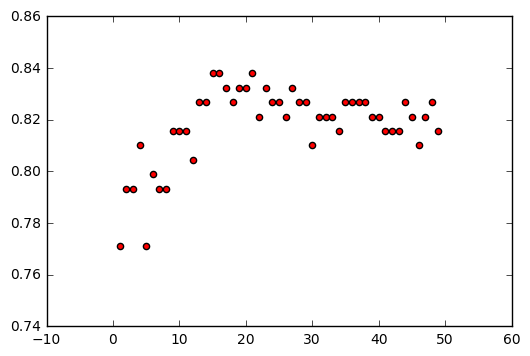

In [14]:
plt.scatter(train_result['neighbors'],train_result['accuracy'], c='r')
plt.show()

As per tuning the model using the 1 to 50 nearest neighbors we find the lowest neighbors 11 giving the best efficiency. We also found that there are multiple points on the plot which gives the best accuracy. But given the simplicity of the model using 11  nearest neighbor will be better for prediction.

In [15]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.815642458101


## Prediction

Implementing the pre processing steps performed witht the training set:

In [16]:
passengers = test['PassengerId']
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
# Drop columns PassengerId,Name and Embarked
del test['PassengerId']
del test['Name']
del test['Cabin']
del test['Ticket']
del test['Embarked']

#Factorizing the Age variable
l = pd.factorize(test['Sex'])
test['Sex']=l[0]

#Converting the string nan values to numpy NaN value
test['Age'] = test['Age'].replace("nan",np.nan)

#Replacing the NaN value to the mean values of the column
test['Age'].fillna(test['Age'].mean(),inplace = True)


#Converting the string nan values to numpy NaN value
test['Fare'] = test['Fare'].replace("nan",np.nan)

#Replacing the NaN value to the mean values of the column
test['Fare'].fillna(test['Fare'].mean(),inplace = True)
# Normalize the age variable
test['Age'] =  scale.fit_transform(test['Age'])

# Normalize the fare variable
test['Fare'] = scale.fit_transform(test['Fare'])

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single 

Predict the test dataset using the the previously found optimal tuning parameter of 9 nearest neighbors.

In [18]:
#predict the value witht the new test data set
test_val = knn.predict(test)

#creating the test dataframe
test_predict = pd.DataFrame(columns=['PassengerId','Survival'])
test_predict['PassengerId'] = passengers
test_predict['Survival'] = test_val

## Exporting the Result

In [19]:
test_predict.to_csv("result.csv")